# Pakistani EDA

In [6]:
import numpy as np
import pandas as pd
import sklearn.preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
import nltk
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
from keras.utils import np_utils
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
sns.set()

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Thesis/Bpd.xlsx") 

In [9]:
df.head()

,Cases,Diagnosis,Mood-Stabilizer,Antipsychotic,Sleeping pills
0,Patient displayed aggressive and violent behav...,Bipolar I,Lithium,Seroquel,Rivotril
1,The patient exhibited aggressive and violent b...,Bipolar I,Lithium,Seroquel,Rivotril
2,The patient had ADHD like systems and extremel...,Bipolar I,Lithium,Seroquel,Rivotril
3,The patient lacks the attention span and obser...,Bipolar I,Lithium,Seroquel,Rivotril
4,The patient showed several inability to focus ...,Bipolar I,Lithium,Seroquel,Rivotril


In [10]:
df.tail()

,Cases,Diagnosis,Mood-Stabilizer,Antipsychotic,Sleeping pills
145,"The patient experienced extreme mood swings, c...",BipolarII,Epival,Risperidone,None
146,"The patient beat his family in a crazy frenzy,...",BipolarII,Epival,Risperidone,None
147,The patient was addicted to drugs in a manic p...,BipolarII,Epival,Risperidone,None
148,"The patient lived in isolation, playing video ...",BipolarII,Epival,Risperidone,None
149,The patient violently attacked a classmate dur...,BipolarII,Epival,Risperidone,None


In [11]:
df['Diagnosis'].value_counts()

Bipolar I    75
BipolarII    75
Name: Diagnosis, dtype: int64

In [12]:
df['Mood-Stabilizer'].value_counts()

Epival     75
Lithium    75
Name: Mood-Stabilizer, dtype: int64

In [13]:
df['Antipsychotic'].value_counts()

Risperidone    75
Seroquel       75
Name: Antipsychotic, dtype: int64

In [14]:
df.dtypes

Cases              object
Diagnosis          object
Mood-Stabilizer    object
Antipsychotic      object
Sleeping pills     object
dtype: object

In [15]:
df.shape

(150, 5)

In [16]:
df.describe()

,Cases,Diagnosis,Mood-Stabilizer,Antipsychotic,Sleeping pills
count,150,150,150,150,150
unique,150,2,2,2,2
top,The patient showed several inability to focus ...,Bipolar I,Epival,Risperidone,Rivotril
freq,1,75,75,75,75


Text(0.5, 1.0, 'Diagnosis')

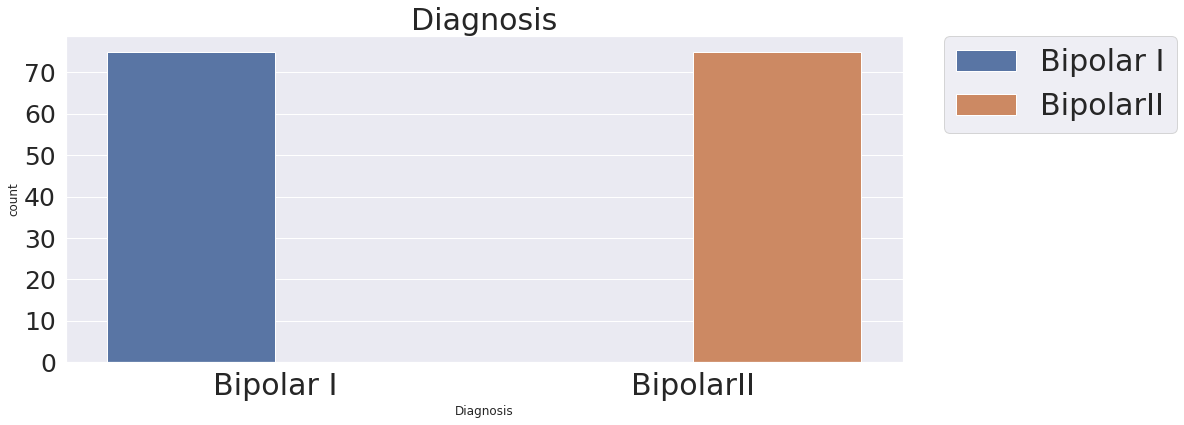

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(x="Diagnosis",hue="Diagnosis",data=df,)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title("Diagnosis",fontsize=30)

Text(0.5, 1.0, 'Mood Stabilizer')

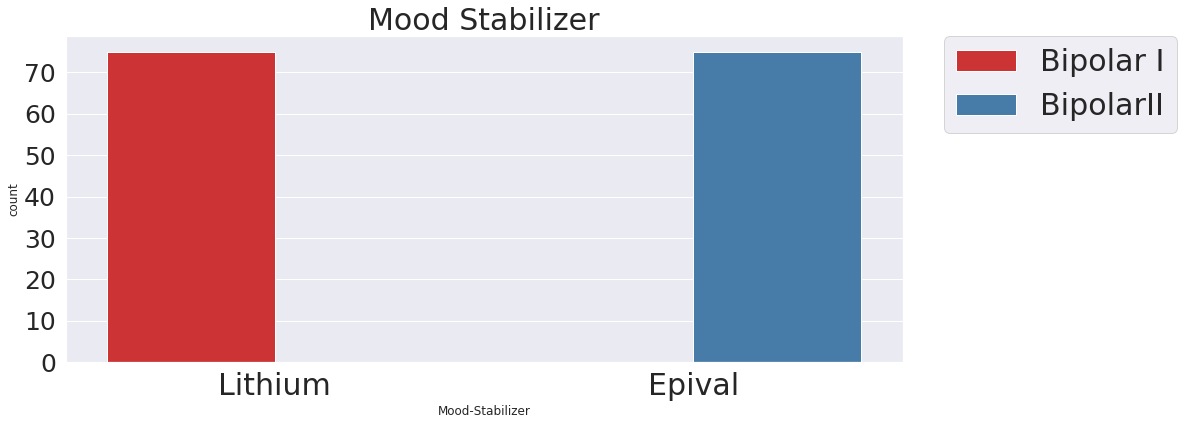

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(x="Mood-Stabilizer",hue="Diagnosis",data=df,palette="Set1")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title("Mood Stabilizer",fontsize=30)

Text(0.5, 1.0, 'Antipsychotic')

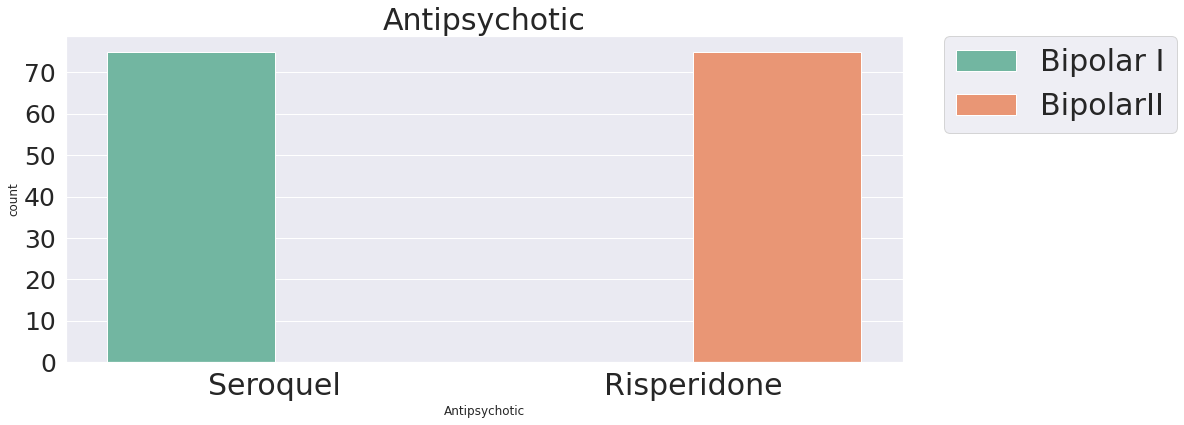

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(x="Antipsychotic",hue="Diagnosis",data=df,palette="Set2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title("Antipsychotic",fontsize=30)

Text(0.5, 1.0, 'Sleeping Pills')

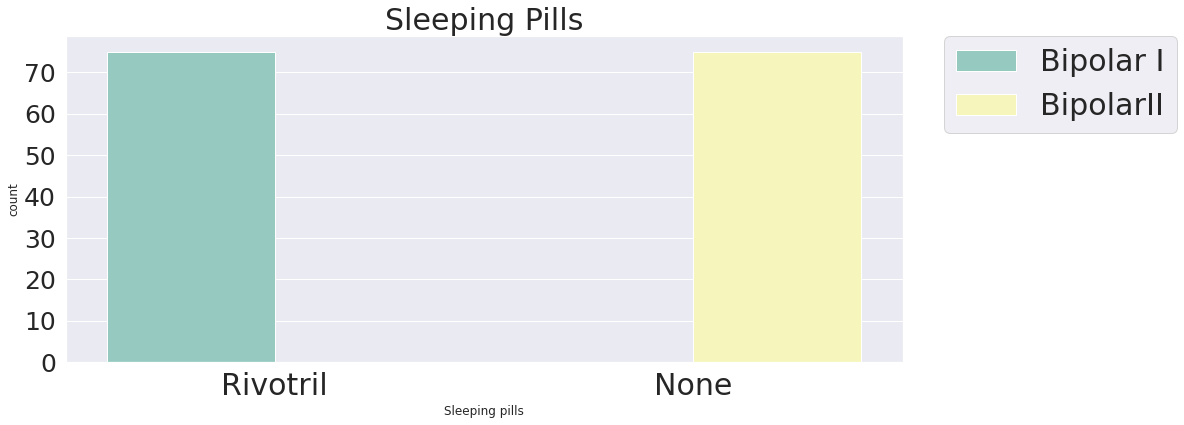

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(x="Sleeping pills",hue="Diagnosis",data=df,palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title("Sleeping Pills",fontsize=30)

In [21]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [22]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [23]:
df1 = df[['Cases','Diagnosis']]
df1.isnull().sum()

Cases        0
Diagnosis    0
dtype: int64

In [24]:
df1.head()

,Cases,Diagnosis
0,Patient displayed aggressive and violent behav...,Bipolar I
1,The patient exhibited aggressive and violent b...,Bipolar I
2,The patient had ADHD like systems and extremel...,Bipolar I
3,The patient lacks the attention span and obser...,Bipolar I
4,The patient showed several inability to focus ...,Bipolar I


In [25]:
df1.tail()

,Cases,Diagnosis
145,"The patient experienced extreme mood swings, c...",BipolarII
146,"The patient beat his family in a crazy frenzy,...",BipolarII
147,The patient was addicted to drugs in a manic p...,BipolarII
148,"The patient lived in isolation, playing video ...",BipolarII
149,The patient violently attacked a classmate dur...,BipolarII


In [26]:
    #lower casing
    df['Cases'] = df['Cases'].str.lower()

    #punctuation removal         
    df["Cases"] = df["Cases"].apply(lambda text: remove_punctuation(text))

In [27]:
df1.head()

,Cases,Diagnosis
0,Patient displayed aggressive and violent behav...,Bipolar I
1,The patient exhibited aggressive and violent b...,Bipolar I
2,The patient had ADHD like systems and extremel...,Bipolar I
3,The patient lacks the attention span and obser...,Bipolar I
4,The patient showed several inability to focus ...,Bipolar I


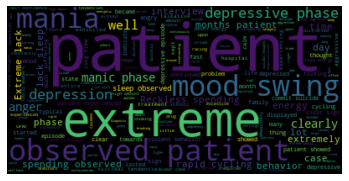

In [28]:
common_words=''
for i in df1.Cases:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
#tokenizer
#Num_words – This hyperparameter refers to the number of words to keep based on the frequency of words.
#Split – This hyperparameter refers to the separator used for splitting the word.
#pad_sequence() function is used to convert a list of sequences into a 2D NumPy array.
#Tokenization and conversion into numerical vectors
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(df1['Cases'].values)
X = tokenizer.texts_to_sequences(df1['Cases'].values)
X = pad_sequences(X)

In [31]:
X.shape[1]

49

In [33]:
#neural nets can learn word embeddings by themselves
model = Sequential()
model.add(Embedding(500, 1028, input_length = X.shape[1]))#500 because tokenizer num_words=500 and 120 instead of this it can be anything
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(256, dropout=0.2, recurrent_dropout=0.2))# LSTM units can be anything drop out value can be anything
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))# 2 because binary labels

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 49, 1028)          514000    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 49, 32)            98720     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 24, 32)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 24, 64)            6208      
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 12, 64)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 12, 128)           24704     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 6, 128)           

In [34]:
model.compile(loss = 'binary_crossentropy',optimizer='adam', metrics = ['accuracy'])

In [35]:
y=df1['Diagnosis']
from sklearn.preprocessing import LabelEncoder
obj=LabelEncoder()
y=obj.fit_transform(y)
#y=pd.get_dummies(df2['Label'])

In [36]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [38]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [41]:
batch_size=128
model.fit(X_train, y_train,validation_split=0.1,epochs = 50, batch_size=batch_size, verbose = 'auto')

Epoch 1/50
1/1 [==============================] - 0s 385ms/step - loss: 0.2594 - accuracy: 0.9907 - val_loss: 0.3664 - val_accuracy: 0.8333
Epoch 2/50
1/1 [==============================] - 0s 345ms/step - loss: 0.1374 - accuracy: 1.0000 - val_loss: 0.3752 - val_accuracy: 0.8333
Epoch 3/50
1/1 [==============================] - 0s 359ms/step - loss: 0.0540 - accuracy: 1.0000 - val_loss: 0.3239 - val_accuracy: 0.8333
Epoch 4/50
1/1 [==============================] - 0s 333ms/step - loss: 0.0407 - accuracy: 0.9815 - val_loss: 1.2051 - val_accuracy: 0.7500
Epoch 5/50
1/1 [==============================] - 0s 357ms/step - loss: 0.0716 - accuracy: 0.9815 - val_loss: 0.5991 - val_accuracy: 0.8333
Epoch 6/50
1/1 [==============================] - 0s 334ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3731 - val_accuracy: 0.9167
Epoch 7/50
1/1 [==============================] - 0s 326ms/step - loss: 0.0235 - accuracy: 0.9907 - val_loss: 0.3610 - val_accuracy: 0.9167
Epoch 8/50
1/1 [====

In [42]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 41ms/step - loss: 1.2657 - accuracy: 0.8667


[1.2657405138015747, 0.8666666746139526]